# Spherical Corrections

SK-DO contains the ability to use spherical corrections for the line of sight.  By default spherical corrections for the solar beam are always enabled.  Here we repeat the basic radiative transfer calculation example using spherical viewing mode.

In [1]:
%matplotlib inline

In [2]:
import sasktran as sk
import sasktran.disco.interface as do
import numpy as np
import matplotlib.pyplot as plt

In [3]:
geometry = sk.NadirGeometry()

# make the look vector from TEMPO to the ARG office
tempo = sk.Geodetic()
tempo.from_lat_lon_alt(0, -100, 35786000)
geometry.from_lat_lon(
    lats=52.131638, 
    lons=-106.633873,
    elevations=0,
    mjd=57906.843, 
    observer=tempo
)

In [4]:
atmosphere = sk.Atmosphere()

# add our species
atmosphere['rayleigh'] = sk.Species(sk.Rayleigh(), sk.MSIS90())
atmosphere['o3'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['no2'] = sk.Species(sk.NO2OSIRISRes(), sk.Pratmo())
atmosphere.atmospheric_state = sk.MSIS90()

# add our surface properties
atmosphere.brdf = 0.3

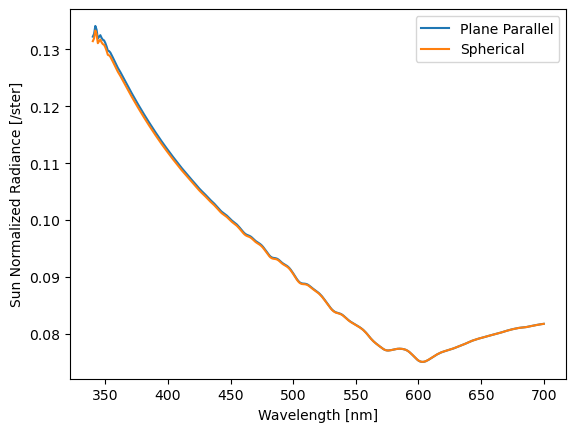

In [5]:
wavelengths = np.linspace(340,700, 361)

# Create a plane parallel model (default) and plot the results
engine = do.EngineDO(geometry=geometry, atmosphere=atmosphere, wavelengths=wavelengths)
engine.viewing_mode = 'plane_parallel'

rad = engine.calculate_radiance()

# Make plot
plt.figure()
plt.plot(rad['wavelength'], rad['radiance'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sun Normalized Radiance [/ster]')


# Create a spherical and plot the results
engine = do.EngineDO(geometry=geometry, atmosphere=atmosphere, wavelengths=wavelengths)
engine.viewing_mode = 'spherical'

rad = engine.calculate_radiance()

# Make plot
plt.plot(rad['wavelength'], rad['radiance'])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Sun Normalized Radiance [/ster]')

plt.legend(['Plane Parallel', 'Spherical'])

plt.show()